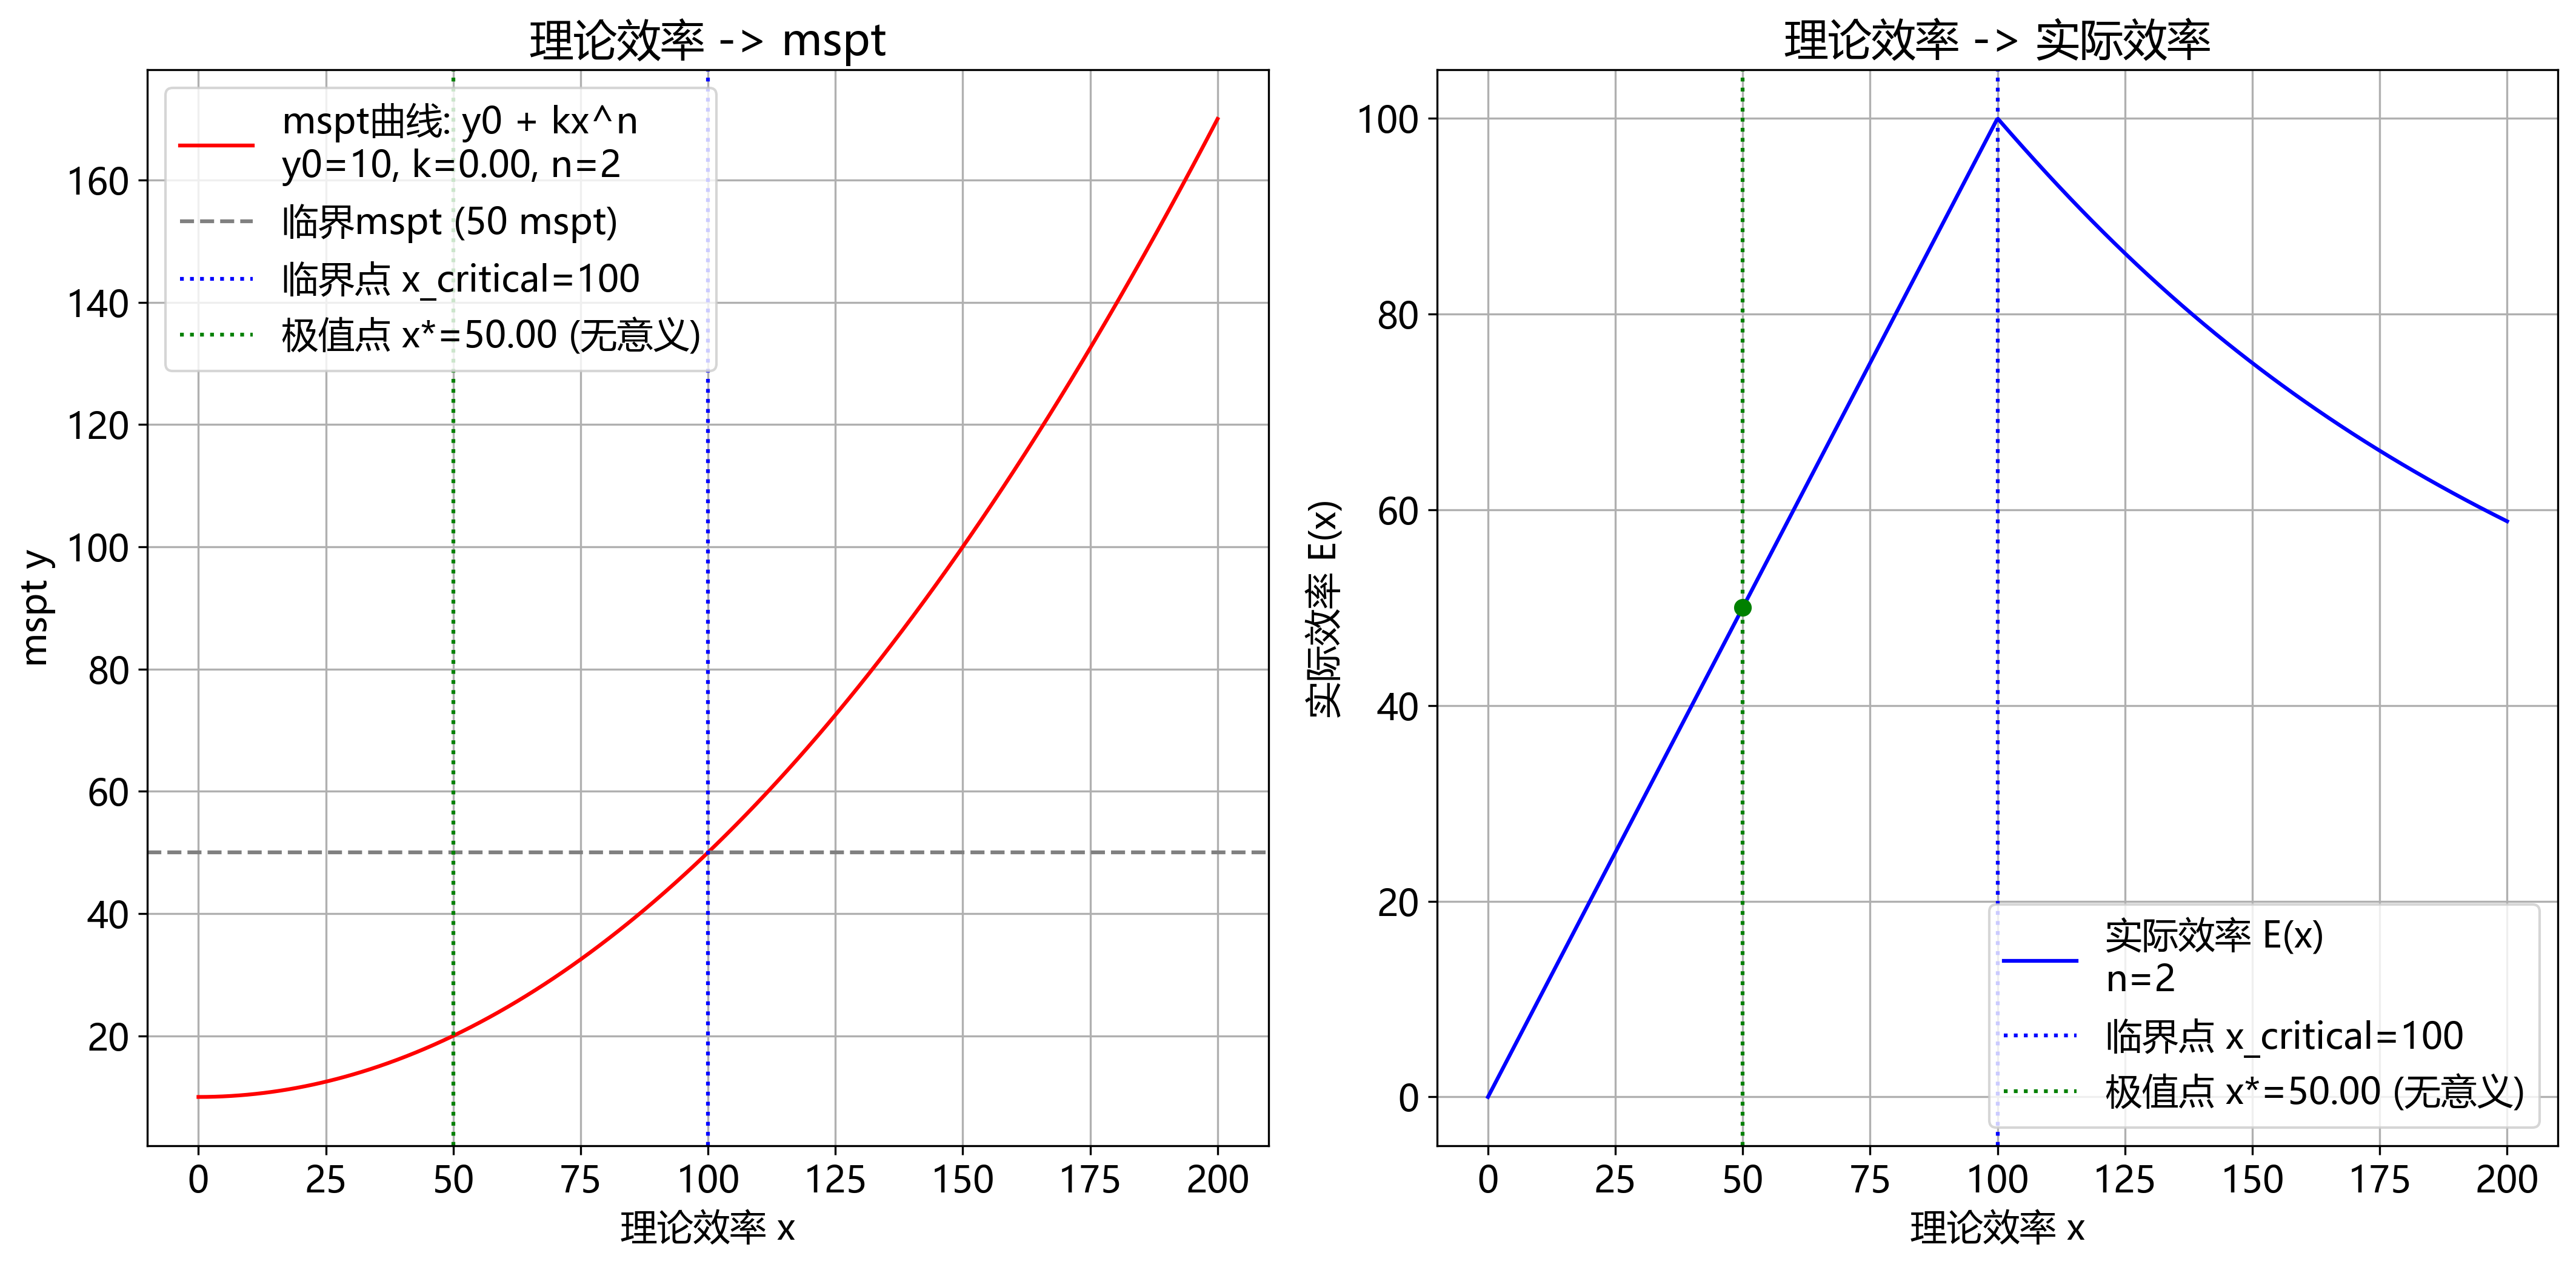


=== 临界关系分析 ===
当前参数：背景卡顿y0=10, 掉刻的临界效率x_critical=100, 卡顿增长指数n=2

当卡顿增长率n固定为2时：
- 背景卡顿y0的临界值：25.00（当y0=25.00时，x*=x_critical）
  当y0 < 25.00：x* > x_critical（极值点有意义）
  当y0 > 25.00：x* < x_critical（极值点无意义）

当背景卡顿y0固定为10时（意义不大，一般情况下无法改变卡顿增长率）：
- 卡顿增长率n的临界值：1.25（当n=1.25时，x*=x_critical）
  当n > 1.25：x* < x_critical（极值点无意义）
  当1 < n < 1.25：x* > x_critical（极值点有意义）


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 参数设置
# x 理论效率，机器的设计效率
# y mspt 服务器计算每tick消耗多少毫秒，可以理解为“卡顿时间”
# E(x) 实际效率，机器在x效率下实际能跑的效率
y0 = 10      # 背景卡顿 (mspt)
x_critical = 100      # 掉刻的临界效率
n = 2        # 卡顿增长指数 (n > 1)

图片像素尺寸 = 2160  # 单位px
dpi = 300
picture_inch_size = 图片像素尺寸 / dpi # matplotlib使用英寸参数，DPI为100，也就是1英寸=100像素
plt.rcParams['font.family'] = 'Microsoft YaHei' # 你得找个中英文都支持的字体，否则中文或英文字符会显示为方框
plt.rcParams['font.size'] = picture_inch_size*2  # 字体尺寸
plt.figure(figsize=(2 * picture_inch_size, picture_inch_size), dpi=dpi)

# 计算比例常数k
if y0 < 50:
    k = (50 - y0) / (x_critical ** n)
else:
    k = 1.0  # 当y0≥50时的默认值
    print(f"警告：背景卡顿y0={y0}≥50mspt，服务器始终掉刻，已经不符合此模型的预设条件（因为x_critical不存在），以下数据均为无意义分析")

# mspt和实际效率的定义
def mspt(x):
    return y0 + k * (x ** n)

def 实际效率(x):
    if y0 >= 50:
        return 50 * x / (y0 + k * (x ** n))
    else:
        return np.where(x <= x_critical, x, 50 * x / (y0 + k * (x ** n)))

# 极值点x*
if n > 1 and y0 < 50:
    x_star = (y0 / (k * (n - 1))) ** (1 / n)
    # 判断极值点是否有意义
    if (y0 < 25 and n == 2) or (y0 < 50*(n-1)/n):
        x_star_meaning = "无意义"
    else:
        x_star_meaning = "有意义"
else:
    x_star = None
    x_star_meaning = "无意义（n≤1或y0≥50）"

x_values = np.linspace(0, 2 * x_critical, 1000)

# 画图：理论效率 -> mspt
plt.subplot(1, 2, 1)
plt.plot(x_values, mspt(x_values), 
         label=f'mspt曲线: y0 + kx^n\ny0={y0}, k={k:.2f}, n={n}', 
         color='red')
plt.axhline(y=50, linestyle='--', color='gray', label='临界mspt (50 mspt)')
if y0 < 50:
    plt.axvline(x=x_critical, linestyle=':', color='blue', label=f'临界点 x_critical={x_critical}')
if x_star is not None:
    plt.axvline(x=x_star, linestyle=':', color='green', 
                label=f'极值点 x*={x_star:.2f} ({x_star_meaning})')
plt.xlabel('理论效率 x')
plt.ylabel('mspt y')
plt.title('理论效率 -> mspt')
plt.legend()
plt.grid(True)

# 画图：理论效率 -> 实际效率
plt.subplot(1, 2, 2)
plt.plot(x_values, 实际效率(x_values), 
         label=f'实际效率 E(x)\nn={n}', 
         color='blue')
if y0 < 50:
    plt.axvline(x=x_critical, linestyle=':', color='blue', 
                label=f'临界点 x_critical={x_critical}')
if x_star is not None:
    plt.axvline(x=x_star, linestyle=':', color='green', 
                label=f'极值点 x*={x_star:.2f} ({x_star_meaning})')
    plt.scatter([x_star], [实际效率(x_star)], color='green', zorder=5)
plt.xlabel('理论效率 x')
plt.ylabel('实际效率 E(x)')
plt.title('理论效率 -> 实际效率')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 输出临界关系分析
print("\n=== 临界关系分析 ===")
print(f"当前参数：背景卡顿y0={y0}, 掉刻的临界效率x_critical={x_critical}, 卡顿增长指数n={n}")

# 分析n不变，y0变化的情况
if n > 1:
    y0_critical = 50 * (n - 1) / n
    print(f"\n当卡顿增长率n固定为{n}时：")
    print(f"- 背景卡顿y0的临界值：{y0_critical:.2f}（当y0={y0_critical:.2f}时，x*=x_critical）")
    print(f"  当y0 < {y0_critical:.2f}：x* > x_critical（极值点有意义）")
    print(f"  当y0 > {y0_critical:.2f}：x* < x_critical（极值点无意义）")
else:
    print("\n当n≤1时，极值点始终无意义")

# 分析y0不变，n变化的情况
if y0 < 50:
    n_critical = 50 / (50 - y0)
    print(f"\n当背景卡顿y0固定为{y0}时（意义不大，一般情况下无法改变卡顿增长率）：")
    print(f"- 卡顿增长率n的临界值：{n_critical:.2f}（当n={n_critical:.2f}时，x*=x_critical）")
    print(f"  当n > {n_critical:.2f}：x* < x_critical（极值点无意义）")
    print(f"  当1 < n < {n_critical:.2f}：x* > x_critical（极值点有意义）")
else:
    print("\n当y0≥50时，极值点始终无意义")